## QUIZ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV

1. โหลด csv เข้าไปใน Python Pandas

In [2]:
df = pd.read_csv('german_credit_data.csv', index_col=0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [3]:
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [4]:
df.tail(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
990,37,male,1,own,NaN,NaN,3565,12,education,good
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
992,23,male,1,rent,NaN,little,1936,18,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
994,50,male,2,own,NaN,NaN,2390,12,car,good
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
df.sample(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
133,47,male,2,free,little,NaN,1984,18,furniture/equipment,good
932,30,male,2,own,little,NaN,1224,9,car,good
27,42,female,2,rent,rich,rich,409,12,radio/TV,good
799,35,male,0,own,NaN,moderate,1549,9,car,good
853,32,male,1,free,little,little,1442,18,car,bad
111,23,female,2,rent,little,rich,392,15,education,good
503,38,male,2,own,moderate,moderate,1216,24,radio/TV,bad
944,46,female,2,rent,little,little,1845,15,furniture/equipment,good
946,30,male,2,free,quite rich,little,3349,24,furniture/equipment,bad
53,31,male,2,own,NaN,NaN,3378,18,car,good


3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [7]:
df = df.dropna()

4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 10 columns):
Age                 522 non-null int64
Sex                 522 non-null object
Job                 522 non-null int64
Housing             522 non-null object
Saving accounts     522 non-null object
Checking account    522 non-null object
Credit amount       522 non-null int64
Duration            522 non-null int64
Purpose             522 non-null object
Risk                522 non-null object
dtypes: int64(4), object(6)
memory usage: 44.9+ KB


In [9]:
df.describe()

,Age,Job,Credit amount,Duration
count,522.000000,522.000000,522.000000,522.000000
mean,34.888889,1.875479,3278.745211,21.339080
std,11.787918,0.682811,2929.155177,12.474079
min,19.000000,0.000000,276.000000,6.000000
25%,26.000000,2.000000,1297.500000,12.000000
50%,31.500000,2.000000,2326.500000,18.000000
75%,41.000000,2.000000,3971.250000,26.750000
max,75.000000,3.000000,18424.000000,72.000000


5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ

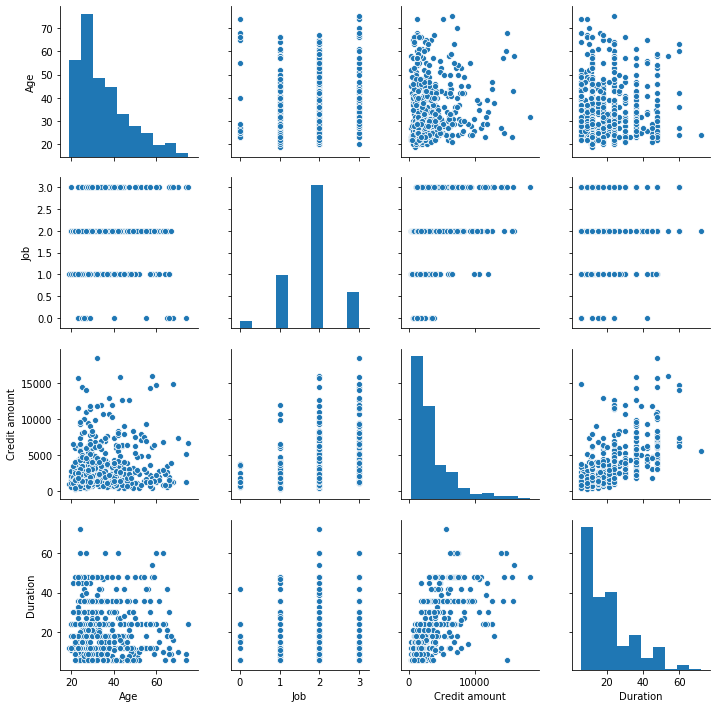

In [10]:
sns.pairplot(df)

6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

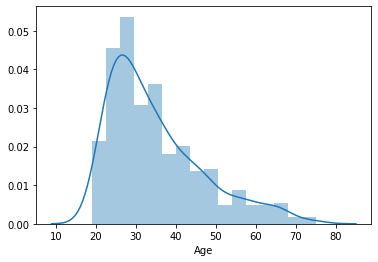

In [11]:
sns.distplot(df['Age'])

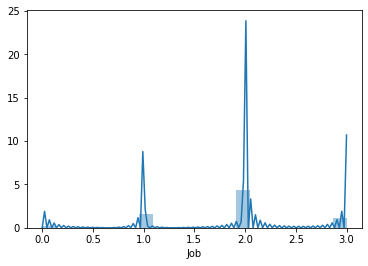

In [12]:
sns.distplot(df['Job'])

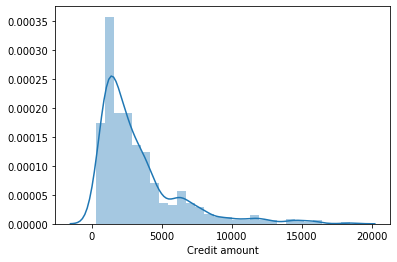

In [13]:
sns.distplot(df['Credit amount'])

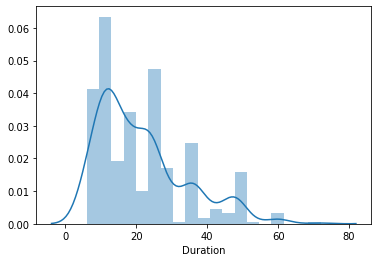

In [14]:
sns.distplot(df['Duration'])

7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

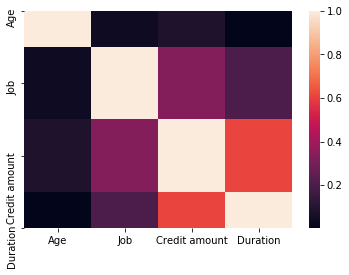

In [15]:
sns.heatmap(df.corr())

8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

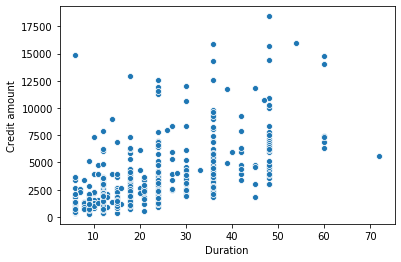

In [16]:
sns.scatterplot(x='Duration', y='Credit amount', data=df)

9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

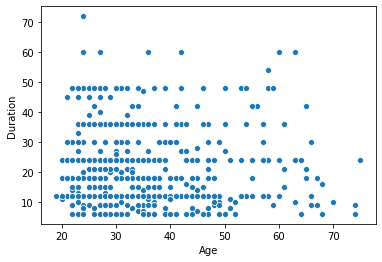

In [17]:
sns.scatterplot(x='Age', y='Duration', data=df)

10. สร้าง histogram ของ feature ที่สนใจ

(array([232., 150.,  54.,  43.,  17.,   8.,   9.,   4.,   4.,   1.]),
 array([  276. ,  2090.8,  3905.6,  5720.4,  7535.2,  9350. , 11164.8,
        12979.6, 14794.4, 16609.2, 18424. ]),
 <a list of 10 Patch objects>)

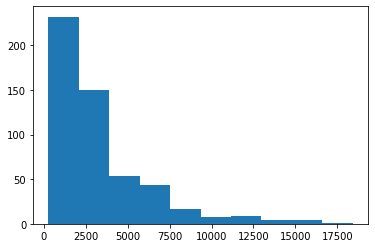

In [18]:
plt.hist(df['Credit amount'])

11. สร้าง box plot ของ features ที่สนใจ

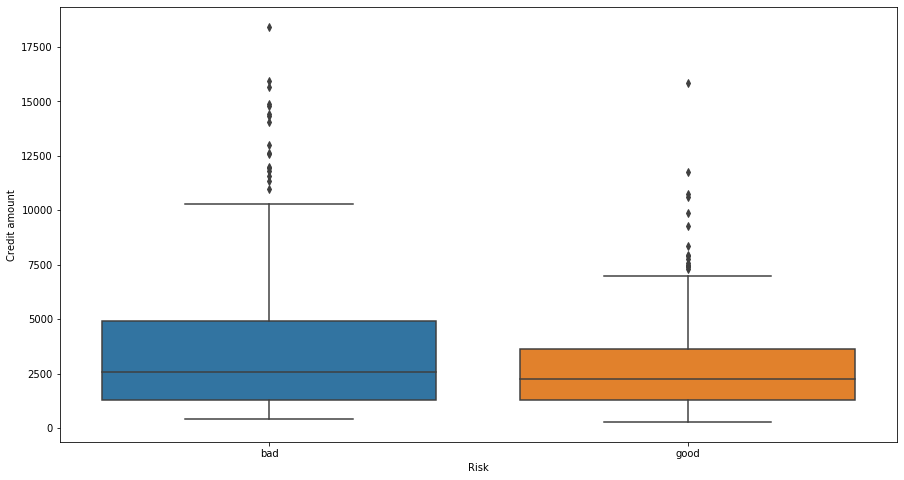

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Risk', y='Credit amount', data=df)

12. สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10
ratio ได้ตามใจ


In [20]:
df_real = pd.get_dummies(df,drop_first=True)
df_real

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
1,22,2,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,35,3,6948,36,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
9,28,3,5234,30,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,48,1,1743,24,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
993,30,3,3959,36,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
996,40,3,3857,30,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
998,23,2,1845,45,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df_real.drop('Risk_good', axis = 1))
n_df = pd.DataFrame(df_minmax, columns=df_real.columns[:-1])
n_df

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.053571,0.666667,0.312707,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.464286,0.666667,0.419110,0.545455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.607143,0.666667,0.253141,0.272727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.285714,1.000000,0.367644,0.454545,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.160714,1.000000,0.273198,0.363636,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0.517857,0.333333,0.080835,0.272727,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
518,0.196429,1.000000,0.202942,0.454545,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
519,0.375000,1.000000,0.197322,0.363636,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
520,0.071429,0.666667,0.086456,0.590909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
std = StandardScaler()
df_std = std.fit_transform(df_real.drop('Risk_good', axis = 1))
n_df2 = pd.DataFrame(df_std, columns=df_real.columns[:-1])
n_df2

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,-1.094447,0.182540,0.913171,2.139356,-1.451600,0.704061,-0.510754,-0.373815,-0.214691,-0.214691,1.153411,-0.336164,-0.704061,-0.107833,-0.238076,-0.507771,1.718879,-0.166009,-0.132453
1,0.858575,0.182540,1.573037,1.657897,0.688895,-1.420331,-0.510754,-0.373815,-0.214691,-0.214691,-0.866994,-0.336164,-0.704061,-0.107833,-0.238076,1.969392,-0.581774,-0.166009,-0.132453
2,1.537887,0.182540,0.543768,0.213521,0.688895,-1.420331,-0.510754,-0.373815,-0.214691,-0.214691,-0.866994,-0.336164,1.420331,-0.107833,-0.238076,-0.507771,-0.581774,-0.166009,-0.132453
3,0.009435,1.648480,1.253868,1.176438,0.688895,-1.420331,1.957890,-0.373815,-0.214691,-0.214691,1.153411,-0.336164,1.420331,-0.107833,-0.238076,-0.507771,-0.581774,-0.166009,-0.132453
4,-0.584963,1.648480,0.668155,0.694979,0.688895,0.704061,-0.510754,-0.373815,-0.214691,-0.214691,1.153411,-0.336164,1.420331,-0.107833,-0.238076,-0.507771,-0.581774,-0.166009,-0.132453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,1.113317,-1.283399,-0.524799,0.213521,0.688895,0.704061,-0.510754,-0.373815,-0.214691,-0.214691,1.153411,-0.336164,-0.704061,-0.107833,-0.238076,-0.507771,1.718879,-0.166009,-0.132453
518,-0.415135,1.648480,0.232459,1.176438,0.688895,0.704061,-0.510754,-0.373815,-0.214691,-0.214691,-0.866994,-0.336164,-0.704061,-0.107833,-0.238076,1.969392,-0.581774,-0.166009,-0.132453
519,0.434005,1.648480,0.197603,0.694979,0.688895,0.704061,-0.510754,-0.373815,-0.214691,-0.214691,-0.866994,-0.336164,1.420331,-0.107833,-0.238076,-0.507771,-0.581774,-0.166009,-0.132453
520,-1.009533,0.182540,-0.489943,1.898626,0.688895,-1.420331,-0.510754,-0.373815,-0.214691,-0.214691,-0.866994,-0.336164,-0.704061,-0.107833,-0.238076,-0.507771,1.718879,-0.166009,-0.132453


In [23]:
#Default
X = df_real.drop(['Risk_good'], axis=1)
y = df_real['Risk_good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [24]:
#Normalization
X_train2, X_test2, y_train2, y_test2 = train_test_split(n_df, y, test_size=0.2, random_state=100)

In [25]:
#Stadardization
X_train3, X_test3, y_train3, y_test3 = train_test_split(n_df2, y, test_size=0.2, random_state=100)

13. ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)

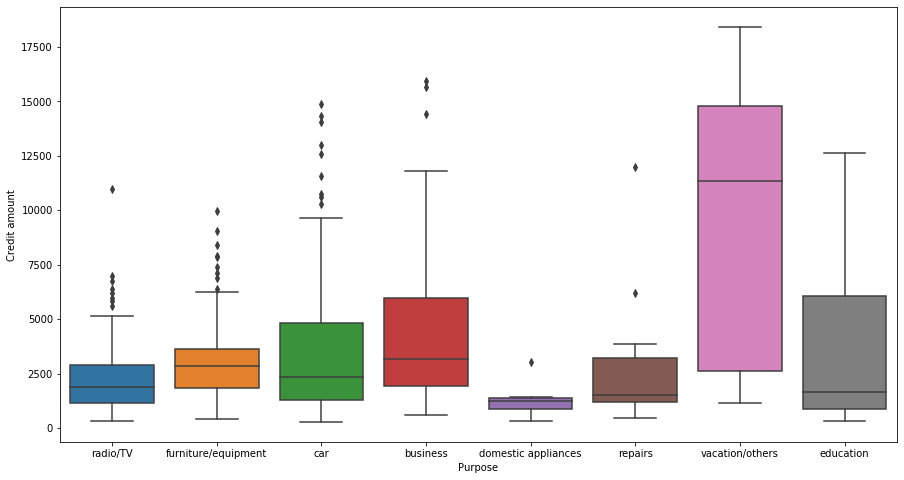

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Purpose', y='Credit amount', data=df)

14. พิจารณาว่าควรทำ Normalization หรือ Standardization หรือไม่ควรทั้งสอง
อย่าง พร้อมให้เหตุผล

In [27]:
#ควรทำ Normalization เพราะข้อมูลไม่เป็น Normal Distribution และกระจายตัวสูง

15. เลือกช้อยที่ดีที่สุดจากข้อ 14 (หรือจะทำทุกอันแล้วนำมาเปรียบเทียบก็ได้)

In [28]:
#Default
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
predicted = rf.predict(X_test)

In [30]:
#Normalization
rf2 = RandomForestClassifier()
rf2.fit(X_train2, y_train2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
predicted2 = rf2.predict(X_test2)

In [32]:
#Standardization
rf3 = RandomForestClassifier()
rf3.fit(X_train3, y_train3)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
predicted3 = rf3.predict(X_test3)

16. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน
Accuracy,F1 score, Recall, Precision

In [34]:
#Default
confusion_matrix(y_test, predicted)

array([[29, 11],
       [33, 32]], dtype=int64)

In [35]:
print('Accuracy = ', accuracy_score(y_test, predicted))
print('F1 Score = ', f1_score(y_test, predicted))
print('Precision = ', precision_score(y_test, predicted))
print('Recall = ', recall_score(y_test, predicted))

Accuracy =  0.580952380952381
F1 Score =  0.5925925925925926
Precision =  0.7441860465116279
Recall =  0.49230769230769234


In [36]:
#Normalization
confusion_matrix(y_test2, predicted2)

array([[28, 12],
       [24, 41]], dtype=int64)

In [37]:
print('Accuracy = ', accuracy_score(y_test2, predicted2))
print('F1 Score = ', f1_score(y_test2, predicted2))
print('Precision = ', precision_score(y_test2, predicted2))
print('Recall = ', recall_score(y_test2, predicted2))

Accuracy =  0.6571428571428571
F1 Score =  0.6949152542372882
Precision =  0.7735849056603774
Recall =  0.6307692307692307


In [38]:
#Standardization
confusion_matrix(y_test3, predicted3)

array([[27, 13],
       [27, 38]], dtype=int64)

In [39]:
print('Accuracy = ', accuracy_score(y_test3, predicted3))
print('F1 Score = ', f1_score(y_test3, predicted3))
print('Precision = ', precision_score(y_test3, predicted3))
print('Recall = ', recall_score(y_test3, predicted3))

Accuracy =  0.6190476190476191
F1 Score =  0.6551724137931034
Precision =  0.7450980392156863
Recall =  0.5846153846153846


17. หาค่า parameter combination ที่ดีที่สุด สำหรับ Dataset นี้ โดยใช้
GridSearch (Hyperparameter Tuning)

In [40]:
#Hyperparameter Tuning
param_combination = {'max_depth':[4,8,16,32,64,128,256], 'min_samples_leaf':[1,2,4,8,12,16,20], 'n_estimators':[10,15,20,30,50,100,500]}
grid_search = GridSearchCV(RandomForestClassifier(), param_combination,verbose=1)

In [42]:
grid_search.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 343 candidates, totalling 1029 fits


[Parallel(n_jobs=1)]: Done 1029 out of 1029 | elapsed:  1.4min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [43]:
grid_search.best_params_

{'max_depth': 16, 'min_samples_leaf': 1, 'n_estimators': 50}

In [45]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
grid_predicted = grid_search.predict(X_test)

In [48]:
#Hyperparameter Tuning
confusion_matrix(y_test, grid_predicted)

array([[27, 13],
       [20, 45]], dtype=int64)

In [49]:
print('Accuracy = ', accuracy_score(y_test, grid_predicted))
print('F1 Score = ', f1_score(y_test, grid_predicted))
print('Precision = ', precision_score(y_test, grid_predicted))
print('Recall = ', recall_score(y_test, grid_predicted))

Accuracy =  0.6857142857142857
F1 Score =  0.7317073170731708
Precision =  0.7758620689655172
Recall =  0.6923076923076923


18. เลือกเฉพาะ features ที่สนใจมาเทรนโมเดล และวัดผลเปรียบเทียบกับแบบ
all-features

In [50]:
#Some features training
X2 = df_real[['Age','Job','Credit amount','Duration','Sex_male']]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X2, y, test_size=0.2, random_state=100)

In [51]:
#Standardization
rf4 = RandomForestClassifier()
rf4.fit(X_train4, y_train4)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
predicted4 = rf4.predict(X_test4)

In [53]:
#Some features
confusion_matrix(y_test4, predicted4)

array([[27, 13],
       [21, 44]], dtype=int64)

In [54]:
print('Accuracy = ', accuracy_score(y_test4, predicted4))
print('F1 Score = ', f1_score(y_test4, predicted4))
print('Precision = ', precision_score(y_test4, predicted4))
print('Recall = ', recall_score(y_test4, predicted4))

Accuracy =  0.6761904761904762
F1 Score =  0.7213114754098361
Precision =  0.7719298245614035
Recall =  0.676923076923077


19. ทำ Visualization ของค่า F1 Score ระหว่าง ผลลัพธ์ที่ได้จากค่า Default,
ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization

In [55]:
data = [[f1_score(y_test, predicted), f1_score(y_test2, predicted2), f1_score(y_test, grid_predicted)],[recall_score(y_test, predicted), recall_score(y_test2, predicted2), recall_score(y_test, grid_predicted)],[accuracy_score(y_test, predicted), accuracy_score(y_test2, predicted2), accuracy_score(y_test, grid_predicted)]]
visual = pd.DataFrame(data=data,index =['F1-Score','Recall','Accuracy'], columns=['Default', 'Normalization', 'Grid Search'])
visual

,Default,Normalization,Grid Search
F1-Score,0.592593,0.694915,0.731707
Recall,0.492308,0.630769,0.692308
Accuracy,0.580952,0.657143,0.685714


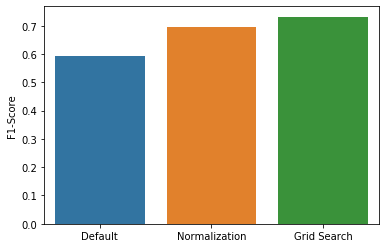

In [57]:
sns.barplot(x=visual.columns, y=visual.iloc[0])

20. ทำ Visualization ของค่า Recall ระหว่าง ผลลัพธ์ที่ได้จากค่า Default,
ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization

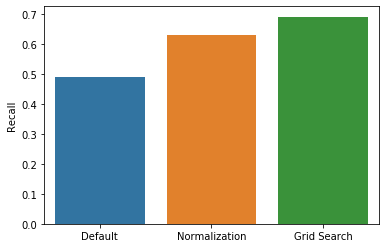

In [58]:
sns.barplot(x=visual.columns, y=visual.iloc[1])

21. ทำ Visualization ของค่า Accuracy ระหว่าง ผลลัพธ์ที่ได้จากค่า Default,
ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์

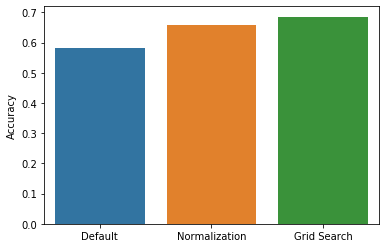

In [59]:
sns.barplot(x=visual.columns, y=visual.iloc[2])

22. สามารถใช้เทคนิคใดก็ได้ตามที่สอนมา ใช้ Decision Tree Algorithm แล้วให้
ผลลัพธ์ที่ดีที่สุดที่เป็นไปได้ (อาจจะรวม Grid Search กับ
Normalization/Standard)

In [60]:
#Grid Search + Normalization
grid_search2 = GridSearchCV(RandomForestClassifier(), param_combination,verbose=1)

In [61]:
grid_search2.fit(X_train2, y_train2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 343 candidates, totalling 1029 fits


[Parallel(n_jobs=1)]: Done 1029 out of 1029 | elapsed:  1.4min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [62]:
grid_predicted2 = grid_search2.predict(X_test2)

In [63]:
confusion_matrix(y_test2, grid_predicted2)

array([[30, 10],
       [19, 46]], dtype=int64)

In [64]:
print('Accuracy = ', accuracy_score(y_test2, grid_predicted2))
print('F1 Score = ', f1_score(y_test2, grid_predicted2))
print('Precision = ', precision_score(y_test2, grid_predicted2))
print('Recall = ', recall_score(y_test2, grid_predicted2))

Accuracy =  0.7238095238095238
F1 Score =  0.7603305785123968
Precision =  0.8214285714285714
Recall =  0.7076923076923077


In [69]:
#Grid Search + Standization
grid_search3 = GridSearchCV(RandomForestClassifier(), param_combination,verbose=1)

In [70]:
grid_search3.fit(X_train3, y_train3)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 343 candidates, totalling 1029 fits


[Parallel(n_jobs=1)]: Done 1029 out of 1029 | elapsed:  1.4min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [71]:
grid_predicted3 = grid_search3.predict(X_test3)

In [72]:
confusion_matrix(y_test3, grid_predicted3)

array([[26, 14],
       [18, 47]], dtype=int64)

In [73]:
print('Accuracy = ', accuracy_score(y_test3, grid_predicted3))
print('F1 Score = ', f1_score(y_test3, grid_predicted3))
print('Precision = ', precision_score(y_test3, grid_predicted3))
print('Recall = ', recall_score(y_test3, grid_predicted3))

Accuracy =  0.6952380952380952
F1 Score =  0.746031746031746
Precision =  0.7704918032786885
Recall =  0.7230769230769231


23. สร้าง bar chart เปรียบเทียบค่า Accuracy, F1 score, Recall, Precision ของ Decision Tree Model ที่ดีที่สุด กับ Random Forest Model ที่ดีที่สุด

In [74]:
#Best Decision Tree Model : Grid Search + Normalization
param_combination2 = {'max_depth':[4,8,16,32,64,128,256], 'min_samples_leaf':[1,2,4,8,12,16,20]}
dtreegrid_search = GridSearchCV(DecisionTreeClassifier(), param_combination2,verbose=1)

In [75]:
dtreegrid_search.fit(X_train2, y_train2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:    0.4s finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32, 64, 128, 256],
                         'min_samples_leaf': [1, 2, 4, 8, 12, 1

In [76]:
dtreegrid_predicted = dtreegrid_search.predict(X_test2)

In [77]:
confusion_matrix(y_test2, dtreegrid_predicted)

array([[28, 12],
       [23, 42]], dtype=int64)

In [78]:
print('Accuracy = ', accuracy_score(y_test2, dtreegrid_predicted))
print('F1 Score = ', f1_score(y_test2, dtreegrid_predicted))
print('Precision = ', precision_score(y_test2, dtreegrid_predicted))
print('Recall = ', recall_score(y_test2, dtreegrid_predicted))

Accuracy =  0.6666666666666666
F1 Score =  0.7058823529411764
Precision =  0.7777777777777778
Recall =  0.6461538461538462


In [79]:
data2 = [[accuracy_score(y_test2, grid_predicted2),accuracy_score(y_test2, dtreegrid_predicted)],[f1_score(y_test2, grid_predicted2),f1_score(y_test2, dtreegrid_predicted)],[recall_score(y_test2, grid_predicted2),recall_score(y_test2, dtreegrid_predicted)],[precision_score(y_test2, grid_predicted2),precision_score(y_test2, dtreegrid_predicted)]]
visual2 = pd.DataFrame(data=data2,index =['Accuracy','F1-Score','Recall','Precision'], columns=['Random Forest','Decision Tree'])
visual2

,Random Forest,Decision Tree
Accuracy,0.723810,0.666667
F1-Score,0.760331,0.705882
Recall,0.707692,0.646154
Precision,0.821429,0.777778


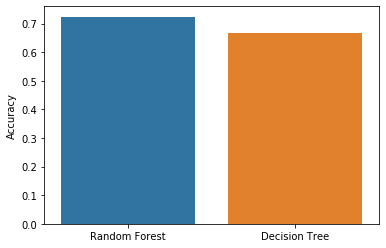

In [81]:
sns.barplot(x=visual2.columns, y=visual2.iloc[0])

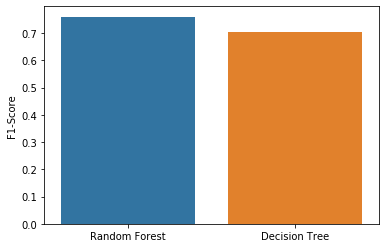

In [82]:
sns.barplot(x=visual2.columns, y=visual2.iloc[1])

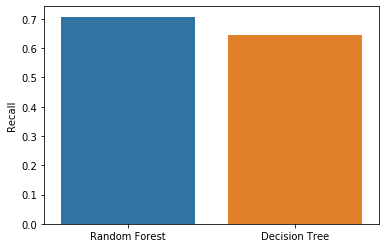

In [83]:
sns.barplot(x=visual2.columns, y=visual2.iloc[2])

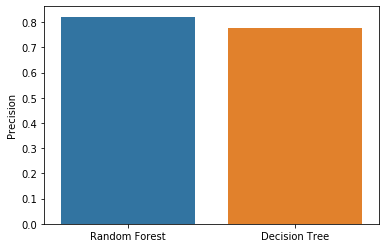

In [84]:
sns.barplot(x=visual2.columns, y=visual2.iloc[3])